**Feature Engineering – Time Features**

In [18]:
df_feat = df_hourly.copy()

# Drop highly correlated feature
df_feat.drop(columns=['Global_intensity'], inplace=True)

# Time features
df_feat['hour'] = df_feat.index.hour
df_feat['weekday'] = df_feat.index.weekday

# Lag & rolling features
df_feat['lag_1'] = df_feat['Global_active_power'].shift(1)
df_feat['lag_24'] = df_feat['Global_active_power'].shift(24)
df_feat['rolling_mean_24'] = df_feat['Global_active_power'].rolling(24).mean()

df_feat.dropna(inplace=True)


**Lag Features & Rolling Statistics**

In [19]:
df_feat['lag_1'] = df_feat['Global_active_power'].shift(1)
df_feat['lag_24'] = df_feat['Global_active_power'].shift(24)

df_feat['rolling_mean_3'] = df_feat['Global_active_power'].rolling(3).mean()
df_feat['rolling_mean_24'] = df_feat['Global_active_power'].rolling(24).mean()

df_feat.dropna(inplace=True)
df_feat.head()


,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3,hour,weekday,lag_1,lag_24,rolling_mean_24,rolling_mean_3
datetime,,,,,,,,,,,,
2006-12-18 17:00:00,2.154900,0.097800,238.729167,0.0,0.333333,17.450000,17,0,1.949300,3.406767,1.590439,1.962833
2006-12-18 18:00:00,2.402533,0.079100,236.668500,0.0,0.250000,16.916667,18,0,2.154900,3.697100,1.536499,2.168911
2006-12-18 19:00:00,2.614500,0.200767,235.329167,0.0,9.100000,0.000000,19,0,2.402533,2.908400,1.524253,2.390644
2006-12-18 20:00:00,3.050567,0.120367,234.524333,0.0,0.500000,13.250000,20,0,2.614500,3.361500,1.511297,2.689200
2006-12-18 21:00:00,2.169733,0.071733,237.590833,0.0,0.000000,3.716667,21,0,3.050567,3.040767,1.475004,2.611600


**Feature Scaling**

In [20]:
scaler = MinMaxScaler()

scaled_cols = df_feat.columns
df_feat[scaled_cols] = scaler.fit_transform(df_feat[scaled_cols])


**Train / Test Split**

In [21]:
X = df_feat.drop('Global_active_power', axis=1)
y = df_feat['Global_active_power']

split = int(len(df_feat) * 0.8)

X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [25]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Baseline Model – Linear Regression**

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


**Model Evaluation**

In [27]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Baseline Linear Regression Performance")
print(f"MAE  : {mae:.4f}")
print(f"RMSE : {rmse:.4f}")


Baseline Linear Regression Performance
MAE  : 0.0510
RMSE : 0.0657


**Actual vs Predicted Plot**

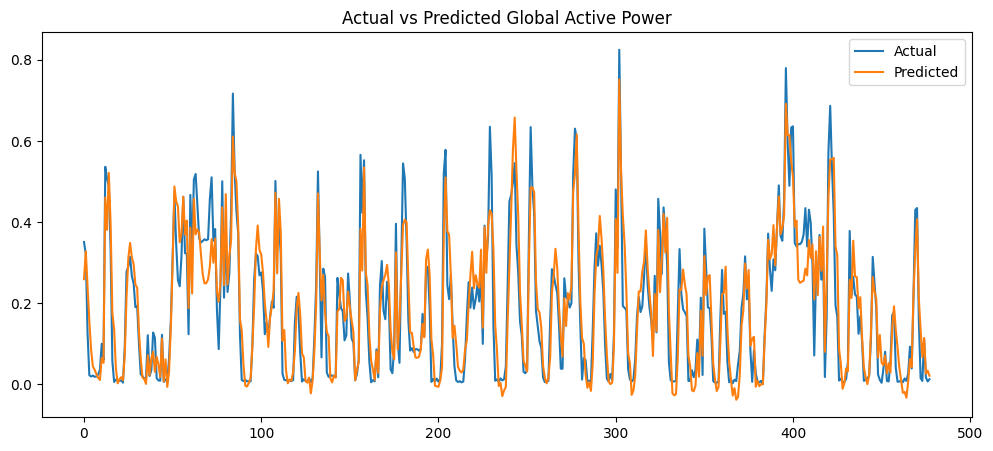

In [28]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Global Active Power")
plt.show()


**Train Linear & Ridge Models**

In [29]:
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Train models
lr = LinearRegression()
ridge = Ridge(alpha=1.0)

lr.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Predictions
lr_pred = lr.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)

# Metrics
print("Linear Regression RMSE:",
      np.sqrt(mean_squared_error(y_test, lr_pred)))

print("Ridge Regression RMSE:",
      np.sqrt(mean_squared_error(y_test, ridge_pred)))


Linear Regression RMSE: 0.06571382815444357
Ridge Regression RMSE: 0.06555851176843874


**Plot Ridge Predictions**

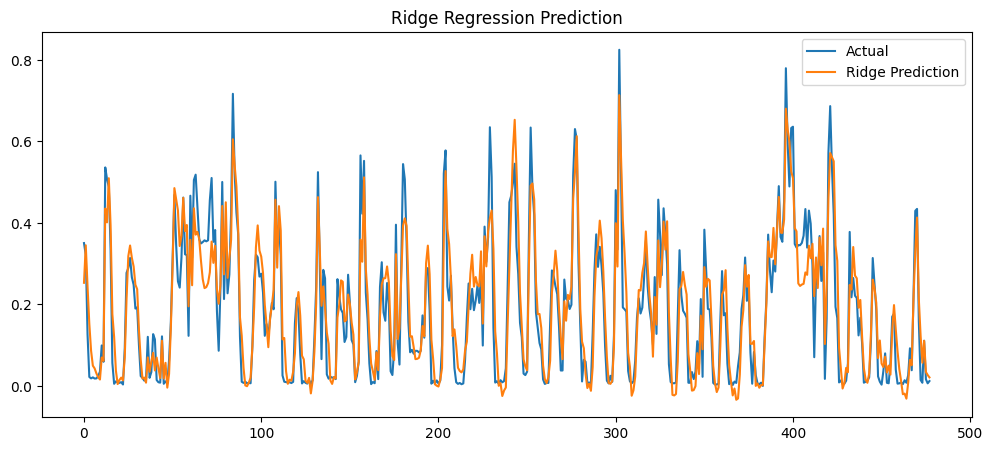

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(y_test.values, label='Actual')
plt.plot(ridge_pred, label='Ridge Prediction')
plt.legend()
plt.title("Ridge Regression Prediction")
plt.show()
